First 5 rows:
    CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4               

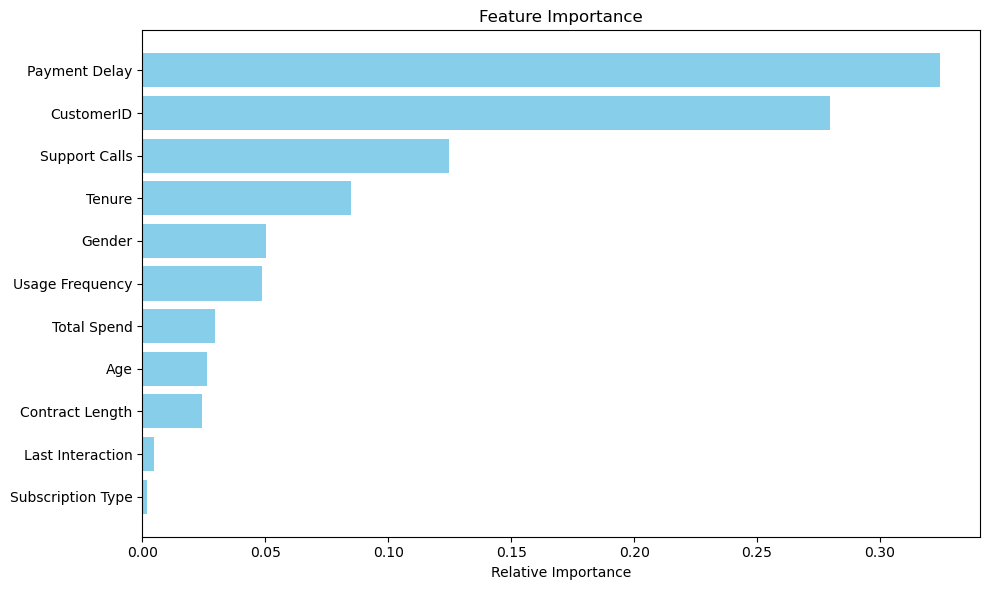

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\VINODA B L\\OneDrive\\customer_churn_dataset-testing-master.csv\\customer_churn_dataset-testing-master.csv")
# <-- Change this to your actual file name if needed

# Step 2: Initial data check
print("First 5 rows:\n", df.head())
print("\nDataset info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nChurn class distribution:\n", df['Churn'].value_counts())  # Ensure column is named 'Churn'

# Step 3: Drop unnecessary columns (modify as per your dataset)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Step 4: Handle missing values
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Step 5: Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Save encoders if you need to decode later

# Step 6: Split dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Feature importance visualization
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="skyblue", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()
